In [0]:
import numpy as np

import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from torchvision import models
from torchvision import transforms as tfs
from torchvision.datasets import ImageFolder

In [0]:
#!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

In [0]:
#!unzip hymenoptera_data.zip

In [0]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

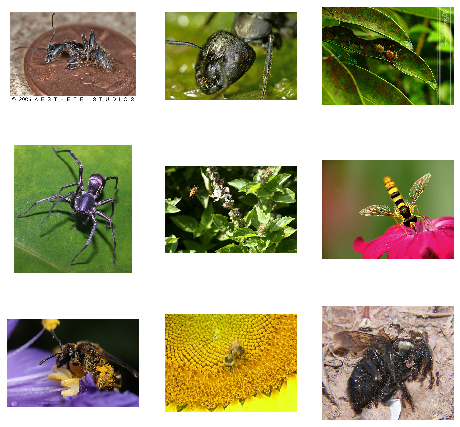

In [0]:
root_path = './hymenoptera_data/train/'
im_list = [os.path.join(root_path, 'ants', i) for i in os.listdir(root_path + 'ants')[:4]]
im_list += [os.path.join(root_path, 'bees', i) for i in os.listdir(root_path + 'bees')[:5]]

nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(Image.open(im_list[nrows*i+j]))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [0]:
train_tf = tfs.Compose([
    tfs.RandomResizedCrop(224),
    tfs.RandomHorizontalFlip(),
    tfs.ToTensor(),
    tfs.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

valid_tf = tfs.Compose([
    tfs.Resize(256),
    tfs.CenterCrop(224),
    tfs.ToTensor(),
    tfs.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [0]:
train_set = ImageFolder('./hymenoptera_data/train/', train_tf)
valid_set = ImageFolder('./hymenoptera_data/val', valid_tf)

train_data = DataLoader(train_set, 64, True, num_workers=4)
valid_data = DataLoader(valid_set, 128, False, num_workers=4)

In [0]:
net = models.resnet18(pretrained=True)
print(net)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:00, 59546958.56it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
print(net.conv1.weight)

Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01]

In [0]:
net.fc = nn.Linear(512, 2)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-4)

In [0]:
from Myutils import train
train(net, train_data, valid_data, 20, optimizer, criterion)

/content/Myutils.py:72: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  im = Variable(im.cuda(), volatile=True)
/content/Myutils.py:73: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label.cuda(), volatile=True)


Epoch 0. Train Loss: 0.604835, Train Acc: 0.638822, Valid Loss: 0.497596, Valid Acc: 0.809219, Time 00:00:03
Epoch 1. Train Loss: 0.393667, Train Acc: 0.854267, Valid Loss: 0.327398, Valid Acc: 0.928750, Time 00:00:05
Epoch 2. Train Loss: 0.367633, Train Acc: 0.875000, Valid Loss: 0.453550, Valid Acc: 0.792656, Time 00:00:06
Epoch 3. Train Loss: 0.298975, Train Acc: 0.900541, Valid Loss: 0.280970, Valid Acc: 0.916562, Time 00:00:05
Epoch 4. Train Loss: 0.279627, Train Acc: 0.897837, Valid Loss: 0.246815, Valid Acc: 0.920469, Time 00:00:05
Epoch 5. Train Loss: 0.233592, Train Acc: 0.913462, Valid Loss: 0.218605, Valid Acc: 0.920469, Time 00:00:05
Epoch 6. Train Loss: 0.209810, Train Acc: 0.947416, Valid Loss: 0.214624, Valid Acc: 0.924375, Time 00:00:06
Epoch 7. Train Loss: 0.184676, Train Acc: 0.951322, Valid Loss: 0.223409, Valid Acc: 0.924375, Time 00:00:06
Epoch 8. Train Loss: 0.171869, Train Acc: 0.947416, Valid Loss: 0.205889, Valid Acc: 0.924375, Time 00:00:06
Epoch 9. Train Loss

In [0]:
net = net.eval()

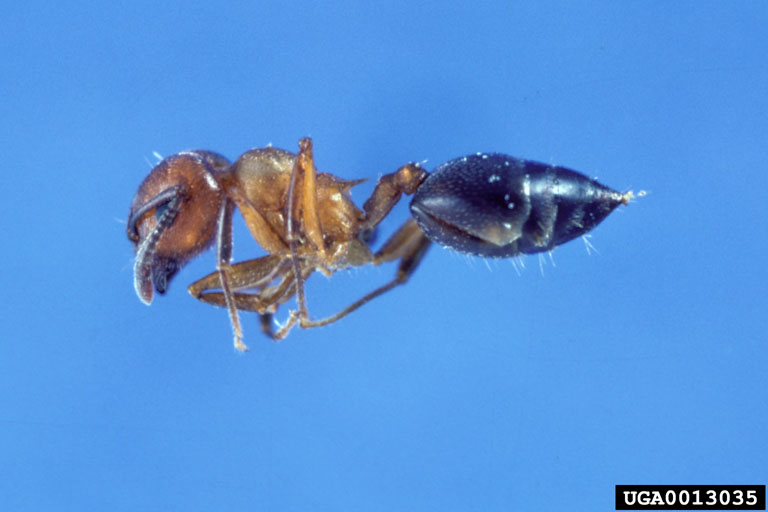

In [0]:
im1 = Image.open('./hymenoptera_data/train/ants/0013035.jpg')
im1

In [0]:
im = valid_tf(im1)
out = net(Variable(im.unsqueeze(0)).cuda())
pred_label = out.max(1)[1].data[0]
print('predict label:{}'.format(train_set.classes[pred_label]))

predict label:ants


In [2]:
vgg = models.vgg16(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:08, 65826130.07it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d